# Carga de Librerías

In [1]:
from __future__ import division

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Carga de datos

In [2]:
df_youtube = pd.read_csv('Datasets/MXvideos.csv')

# Análisis de Datos

In [3]:
df_youtube.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,SbOwzAl9ZfQ,17.14.11,Capítulo 12 | MasterChef 2017,MasterChef 2017,24,2017-11-13T06:06:22.000Z,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130,4182,361,1836,https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg,False,False,False,Disfruta la presencia del Chef Torreblanca en ...
1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22,2017-11-13T05:11:58.000Z,La Voz Mexico 7,104972,271,174,369,https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg,False,False,False,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...
2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÓ - EL PULSO DE LA REPÚBLICA,El Pulso De La República,25,2017-11-13T17:00:02.000Z,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064,10105,266,607,https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg,False,False,False,La canción del principio se llama “Este espíri...


In [4]:
df_youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40451 entries, 0 to 40450
Data columns (total 16 columns):
video_id                  40451 non-null object
trending_date             40451 non-null object
title                     40451 non-null object
channel_title             40451 non-null object
category_id               40451 non-null int64
publish_time              40451 non-null object
tags                      40451 non-null object
views                     40451 non-null int64
likes                     40451 non-null int64
dislikes                  40451 non-null int64
comment_count             40451 non-null int64
thumbnail_link            40451 non-null object
comments_disabled         40451 non-null bool
ratings_disabled          40451 non-null bool
video_error_or_removed    40451 non-null bool
description               36227 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.1+ MB


## Verificamos cuántas variables tienen *missing*

In [5]:
df_youtube.isnull().any()

video_id                  False
trending_date             False
title                     False
channel_title             False
category_id               False
publish_time              False
tags                      False
views                     False
likes                     False
dislikes                  False
comment_count             False
thumbnail_link            False
comments_disabled         False
ratings_disabled          False
video_error_or_removed    False
description                True
dtype: bool

In [6]:
pct = [x/10 for x in range(10)]
pct.append(0.95)
pct.append(0.99)
df_youtube.describe(pct)

,category_id,views,likes,dislikes,comment_count
count,40451.000000,4.045100e+04,4.045100e+04,4.045100e+04,40451.000000
mean,21.003140,3.423820e+05,1.586184e+04,7.471604e+02,2039.660008
std,5.878995,1.714691e+06,8.108987e+04,1.095358e+04,13938.031797
min,1.000000,1.570000e+02,0.000000e+00,0.000000e+00,0.000000
0%,1.000000,1.570000e+02,0.000000e+00,0.000000e+00,0.000000
10%,10.000000,6.887000e+03,8.400000e+01,5.000000e+00,9.000000
20%,17.000000,1.297000e+04,2.120000e+02,1.200000e+01,28.000000
30%,22.000000,2.165300e+04,4.070000e+02,2.200000e+01,60.000000
40%,22.000000,3.576000e+04,7.220000e+02,3.800000e+01,112.000000
50%,24.000000,5.697300e+04,1.246000e+03,6.300000e+01,196.000000


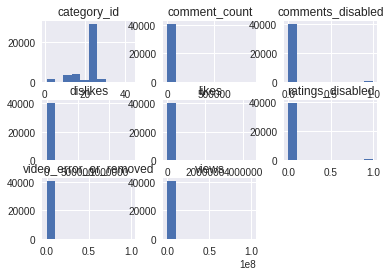

In [7]:
df_youtube.hist()
plt.show()

## Removemos los videos que han sido eliminados

In [8]:
df_youtube['video_error_or_removed'].value_counts()

False    40427
True        24
Name: video_error_or_removed, dtype: int64

In [9]:
df_youtube = df_youtube[df_youtube['video_error_or_removed'] != True]

### Cada que eliminamos filas (u observaciones) se debe resetear el índice

Se le agrega *drop = True* para que no genere una nueva variable con los índices reseteados.

In [10]:
df_youtube.reset_index(inplace=True, drop=True)

## Eliminamos variables que no vamos a usar

In [11]:
df_youtube.columns

Index([u'video_id', u'trending_date', u'title', u'channel_title',
       u'category_id', u'publish_time', u'tags', u'views', u'likes',
       u'dislikes', u'comment_count', u'thumbnail_link', u'comments_disabled',
       u'ratings_disabled', u'video_error_or_removed', u'description'],
      dtype='object')

In [12]:
df_youtube.drop(['video_id', 'thumbnail_link', 'video_error_or_removed', 'description'], inplace=True, axis=1)

In [13]:
df_youtube.head(3)

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled
0,17.14.11,Capítulo 12 | MasterChef 2017,MasterChef 2017,24,2017-11-13T06:06:22.000Z,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130,4182,361,1836,False,False
1,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22,2017-11-13T05:11:58.000Z,La Voz Mexico 7,104972,271,174,369,False,False
2,17.14.11,LOUIS CKAGÓ - EL PULSO DE LA REPÚBLICA,El Pulso De La República,25,2017-11-13T17:00:02.000Z,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064,10105,266,607,False,False


## Generamos varibles *dummy*

In [14]:
df_youtube['comments_disabled'] = df_youtube['comments_disabled'].astype(int)

df_youtube['ratings_disabled'] = df_youtube['ratings_disabled'].astype(int)

## Análizamos la correlación

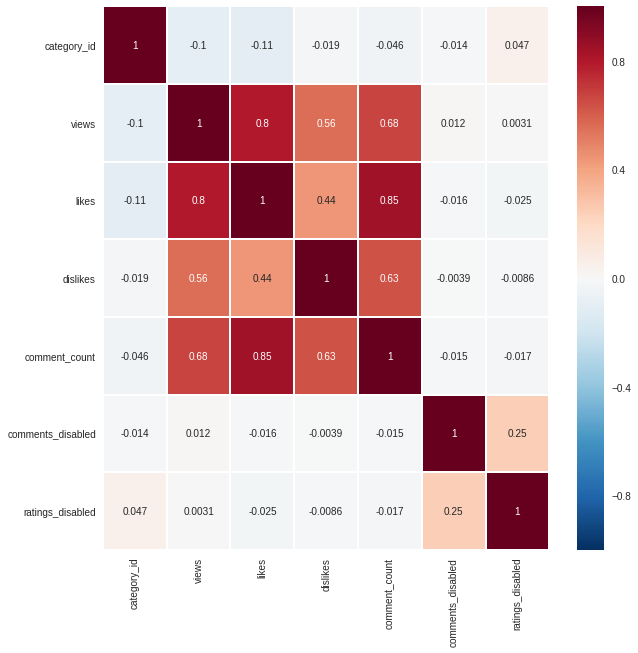

In [15]:
plt.subplots(figsize=(10, 10))
corr = df_youtube.corr()
sns.heatmap(corr, annot=True, linewidths=1.0)
plt.show()

## Tratamos las variables tipo *date*

In [16]:
df_youtube['publish_time'] = pd.to_datetime(df_youtube['publish_time'])

In [17]:
df_youtube.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled
0,17.14.11,Capítulo 12 | MasterChef 2017,MasterChef 2017,24,2017-11-13 06:06:22,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130,4182,361,1836,0,0
1,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22,2017-11-13 05:11:58,La Voz Mexico 7,104972,271,174,369,0,0
2,17.14.11,LOUIS CKAGÓ - EL PULSO DE LA REPÚBLICA,El Pulso De La República,25,2017-11-13 17:00:02,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064,10105,266,607,0,0
3,17.14.11,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,25,2017-11-13 03:47:10,"temblor|""costa rica""|""sismo en costa rica""",96153,378,171,208,0,0
4,17.14.11,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,Musas,26,2017-11-13 19:17:48,"MUSAS|""lesslie""|""karen""|""hacks""|""perros""|""dogs...",499965,57781,681,7428,0,0


In [18]:
z = {1:'year', 2:'day', 3:'month'}

In [19]:
for i in range(1, 4):
    df_youtube[z[i]] = df_youtube['trending_date'].apply(lambda date: date.split('.')[i - 1])

In [20]:
df_youtube.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,year,day,month
0,17.14.11,Capítulo 12 | MasterChef 2017,MasterChef 2017,24,2017-11-13 06:06:22,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130,4182,361,1836,0,0,17,14,11
1,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22,2017-11-13 05:11:58,La Voz Mexico 7,104972,271,174,369,0,0,17,14,11
2,17.14.11,LOUIS CKAGÓ - EL PULSO DE LA REPÚBLICA,El Pulso De La República,25,2017-11-13 17:00:02,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064,10105,266,607,0,0,17,14,11
3,17.14.11,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,25,2017-11-13 03:47:10,"temblor|""costa rica""|""sismo en costa rica""",96153,378,171,208,0,0,17,14,11
4,17.14.11,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,Musas,26,2017-11-13 19:17:48,"MUSAS|""lesslie""|""karen""|""hacks""|""perros""|""dogs...",499965,57781,681,7428,0,0,17,14,11


In [21]:
df_youtube['year'] = '20' + df_youtube['year']

In [22]:
df_youtube['trend'] = df_youtube['year'] + '-' + df_youtube['month'] + '-' + df_youtube['day']

In [23]:
df_youtube['trend'] = pd.to_datetime(df_youtube['trend'])

In [24]:
df_youtube.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,year,day,month,trend
0,17.14.11,Capítulo 12 | MasterChef 2017,MasterChef 2017,24,2017-11-13 06:06:22,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130,4182,361,1836,0,0,2017,14,11,2017-11-14
1,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22,2017-11-13 05:11:58,La Voz Mexico 7,104972,271,174,369,0,0,2017,14,11,2017-11-14
2,17.14.11,LOUIS CKAGÓ - EL PULSO DE LA REPÚBLICA,El Pulso De La República,25,2017-11-13 17:00:02,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064,10105,266,607,0,0,2017,14,11,2017-11-14
3,17.14.11,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,25,2017-11-13 03:47:10,"temblor|""costa rica""|""sismo en costa rica""",96153,378,171,208,0,0,2017,14,11,2017-11-14
4,17.14.11,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,Musas,26,2017-11-13 19:17:48,"MUSAS|""lesslie""|""karen""|""hacks""|""perros""|""dogs...",499965,57781,681,7428,0,0,2017,14,11,2017-11-14


In [25]:
df_youtube.drop(['trending_date', 'year', 'month', 'day'], axis=1, inplace=True)

In [26]:
df_youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40427 entries, 0 to 40426
Data columns (total 12 columns):
title                40427 non-null object
channel_title        40427 non-null object
category_id          40427 non-null int64
publish_time         40427 non-null datetime64[ns]
tags                 40427 non-null object
views                40427 non-null int64
likes                40427 non-null int64
dislikes             40427 non-null int64
comment_count        40427 non-null int64
comments_disabled    40427 non-null int64
ratings_disabled     40427 non-null int64
trend                40427 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(7), object(3)
memory usage: 3.7+ MB


In [27]:
df_youtube.head(3)

,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,trend
0,Capítulo 12 | MasterChef 2017,MasterChef 2017,24,2017-11-13 06:06:22,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130,4182,361,1836,0,0,2017-11-14
1,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22,2017-11-13 05:11:58,La Voz Mexico 7,104972,271,174,369,0,0,2017-11-14
2,LOUIS CKAGÓ - EL PULSO DE LA REPÚBLICA,El Pulso De La República,25,2017-11-13 17:00:02,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064,10105,266,607,0,0,2017-11-14
